# 09_Deep_NN_MNIST_CUDA

[Warnning] This section required GPU device.

In [1]:
# Pytorch Library
import torch
import torch.nn.init
from torch.autograd import Variable

import torchvision.utils as utils
import torchvision.datasets as dsets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np
import random
torch.manual_seed(777)  # reproducibility

### Loading MNIST dataset

In [2]:
# MNIST dataset
mnist_train = dsets.MNIST(root='data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

# Hyper-parameters
batch_size = 100

# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=1)

### Deep Neural Network Model

In [3]:
# Deep Neural Network
linear1 = torch.nn.Linear(784, 512, bias=True)
linear2 = torch.nn.Linear(512, 512, bias=True)
linear3 = torch.nn.Linear(512, 512, bias=True)
linear4 = torch.nn.Linear(512, 512, bias=True)
linear5 = torch.nn.Linear(512, 256, bias=True)
linear6 = torch.nn.Linear(256, 128, bias=True)
linear7 = torch.nn.Linear(128, 10, bias=True)
relu = torch.nn.ReLU()
#sigmoid = torch.nn.Sigmoid()

# xavier initializer
# torch.nn.init.xavier_uniform(linear1.weight)
# torch.nn.init.xavier_uniform(linear2.weight)
# torch.nn.init.xavier_uniform(linear3.weight)
# torch.nn.init.xavier_uniform(linear4.weight)
# torch.nn.init.xavier_uniform(linear5.weight)
# torch.nn.init.xavier_uniform(linear6.weight)
# torch.nn.init.xavier_uniform(linear7.weight)

# model
model = torch.nn.Sequential(linear1, relu,
                            linear2, relu,
                            linear3, relu,
                            linear4, relu,
                            linear5, relu,
                            linear6, relu,
                            linear7, relu)   
model.cuda()

#model.load_state_dict(torch.load('DNN.pkl'))  # Load the Trained Model

print(model)
# print('Weight matrix: ', model.weight.data)
# print('bias vector: ', model.bias.data)


Sequential (
  (0): Linear (784 -> 512)
  (1): ReLU ()
  (2): Linear (512 -> 512)
  (3): ReLU ()
  (4): Linear (512 -> 512)
  (5): ReLU ()
  (6): Linear (512 -> 512)
  (7): ReLU ()
  (8): Linear (512 -> 256)
  (9): ReLU ()
  (10): Linear (256 -> 128)
  (11): ReLU ()
  (12): Linear (128 -> 10)
  (13): ReLU ()
)


### Model 학습

In [14]:
# Softmax 함수가 Cost를 계산할 때 내장되어 있다.
cost_func = torch.nn.CrossEntropyLoss()   

# Hyper-parameters
learning_rate = 0.001 
training_epochs = 30

# Adam Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(mnist_train) // batch_size

    for i, (batch_images, batch_labels) in enumerate(data_loader):
        
        # 이미지를 [batch_size x 784] size 행렬로 변환
        
        X = Variable(batch_images.view(-1, 28 * 28)).cuda()
        Y = Variable(batch_labels).cuda()  # label is not one-hot encoded

        optimizer.zero_grad()             # Zero Gradient Container
        Y_prediction = model(X)           # Forward Propagation
        cost = cost_func(Y_prediction, Y) # compute cost
        cost.backward()                   # compute gradient
        optimizer.step()                  # gradient update

        avg_cost += cost / total_batch

    print("[Epoch: {:>4}] cost = {:>.9}".format(epoch + 1, avg_cost.data[0]))

print('Learning Finished!')

# torch.save(model.state_dict(), 'DNN.pkl')  # Save the Model

[Epoch:    1] cost = 0.556651652
[Epoch:    2] cost = 0.343746841
[Epoch:    3] cost = 0.311643869
[Epoch:    4] cost = 0.291136444
[Epoch:    5] cost = 0.283704191
[Epoch:    6] cost = 0.272350699
[Epoch:    7] cost = 0.268389672
[Epoch:    8] cost = 0.262971342
[Epoch:    9] cost = 0.265035629
[Epoch:   10] cost = 0.255123436
[Epoch:   11] cost = 0.251195043
[Epoch:   12] cost = 0.251167089
[Epoch:   13] cost = 0.24736838
[Epoch:   14] cost = 0.251571566
[Epoch:   15] cost = 0.246433824
[Epoch:   16] cost = 0.245539501
[Epoch:   17] cost = 0.243946388
[Epoch:   18] cost = 0.243684247
[Epoch:   19] cost = 0.24546963
[Epoch:   20] cost = 0.241581306
[Epoch:   21] cost = 0.241334602
[Epoch:   22] cost = 0.239114419
[Epoch:   23] cost = 0.243339986
[Epoch:   24] cost = 0.241198525
[Epoch:   25] cost = 0.237277612
[Epoch:   26] cost = 0.241510257
[Epoch:   27] cost = 0.239520103
[Epoch:   28] cost = 0.238840908
[Epoch:   29] cost = 0.23869592
[Epoch:   30] cost = 0.23714681
Learning Finis

### Test Set을 이용한 모형 성능 측정

In [4]:
model.load_state_dict(torch.load('DNN.pkl'))

# Test the Model
correct = 0
total = 0
for images, labels in mnist_test:
    images = Variable(images.view(-1, 28*28)).cuda()
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += 1
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 88 %


### Random Sample Test

Label:  
 2
[torch.cuda.LongTensor of size 1 (GPU 0)]

Prediction:  
 2
[torch.cuda.LongTensor of size 1 (GPU 0)]



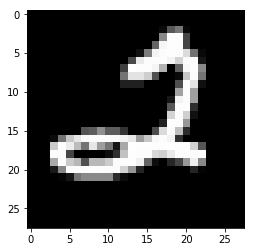

In [5]:
# Get one and predict
r = random.randint(0, len(mnist_test) - 1)
X_single_data = Variable(mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float()).cuda()
Y_single_data = Variable(mnist_test.test_labels[r:r + 1]).cuda()

single_prediction = model(X_single_data)

print("Label: ", Y_single_data.data)
print("Prediction: ", torch.max(single_prediction.data, 1)[1])

plt.imshow(X_single_data.cpu().data.view(28,28).numpy() , cmap='gray')
plt.show()